# **Importing MNIST-Fashion Dataset**

In [1]:
from tensorflow.keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels)=fashion_mnist.load_data()

In [2]:
print(len(train_images))
print(len(train_labels))

60000
60000


In [3]:
print(len(test_images))
print(len(test_labels))

10000
10000


In [4]:
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)


(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Class Label: Ankle boot


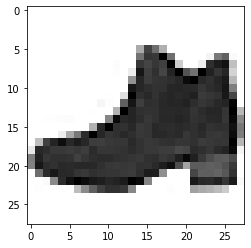

In [6]:
import matplotlib.pyplot as plt
num = 15
item=train_labels[num]
print("Class Label:", class_names[item] )
plt.imshow(train_images[num], cmap=plt.cm.binary)
plt.show()

In [7]:
import numpy as np
print(train_labels)
print(np.unique(train_labels))

[9 0 0 ... 3 0 5]
[0 1 2 3 4 5 6 7 8 9]


In [8]:
import numpy as np
print(test_labels)
print(np.unique(test_labels))

[9 2 1 ... 8 1 5]
[0 1 2 3 4 5 6 7 8 9]


# **Creating the Netwrok Architecture**

In [9]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()

network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation="softmax"))

# **Compilation step**

In [10]:
network.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

# **Preparing the Image data**

In [11]:
train_images=train_images.reshape((60000, 28*28))
train_images=train_images.astype("float32")/255

test_images=test_images.reshape((10000, 28*28))
test_images=test_images.astype("float32")/255

## **Preparing Labels**

In [12]:
train_labels[0]

9



# > **One-Hot-Encode**



In [13]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# **Train the Model**

In [14]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.7355 - accuracy: 0.7482
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.3905 - accuracy: 0.8587
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.3435 - accuracy: 0.8742
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.3072 - accuracy: 0.8868
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.2945 - accuracy: 0.8924


## **Evaluate the Model**

In [15]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print("Test Loss: ", test_loss)
print("Test Accuracy:", test_acc )

313/313 [==============================] - 1s 2ms/step - loss: 0.3792 - accuracy: 0.8640
Test Loss:  0.37919849157333374
Test Accuracy: 0.8640000224113464
